# Reccommender Systems 

### Modeled on Amazon customer ratings reviews




In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
raw_data = pd.read_csv("ratings_Electronics (1).csv",names=['CustomerID','ItemID','Rating','Timestamp'])

In [6]:
raw_data.head()

,CustomerID,ItemID,Rating,Timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [4]:
raw_data.shape

(7824481, 4)

In [7]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
 #   Column      Dtype  
---  ------      -----  
 0   CustomerID  object 
 1   ItemID      object 
 2   Rating      float64
 3   Timestamp   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


In [8]:
raw_data['CustomerID'].value_counts()

A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
                 ... 
A1X2CX4TXV7J5B      1
A10XYYWA1IH67H      1
A1T9OL79FE5H4A      1
A3KIIKLNOJUMNW      1
AZISQ29M8LSAV       1
Name: CustomerID, Length: 4201696, dtype: int64

In [9]:
raw_data['ItemID'].value_counts()

B0074BW614    18244
B00DR0PDNE    16454
B007WTAJTO    14172
B0019EHU8G    12285
B006GWO5WK    12226
              ...  
B000A1SZG0        1
B009J7CNGY        1
B004BV7F9I        1
B0016B4HTM        1
B00FRU8FAK        1
Name: ItemID, Length: 476002, dtype: int64

In [21]:
# Store the number of unique users (set a variable "n_users") 
# and unique items (set a variable "n_items")

n_users = raw_data['CustomerID'].nunique()
n_items = raw_data['ItemID'].nunique()

In [26]:
#Unique users in DF
print(f"The no of unique users in the data is {n_users}")


The no of unique users in the data is 4201696


In [27]:
#Unique items in DF
print(f"The no of unique items in the data is {n_items}")

The no of unique items in the data is 476002


In [11]:
#data=raw_data.groupby('CustomerID').filter(lambda x : len(x) > 100)
#data.head()

,CustomerID,ItemID,Rating,Timestamp
118,AT09WGFUM934H,0594481813,3.0,1377907200
178,A17HMM1M7T9PJ1,0970407998,4.0,1281744000
631,A3TAS1AG6FMBQW,0972683275,5.0,1353456000
1777,A18S2VGUH9SCV5,1400501776,4.0,1340755200
2162,A5JLAU2ARJ0BO,1400532655,1.0,1291334400


In [4]:
#Find the minimum and maximum ratings
print(f'Minimum rating is: {raw_data.Rating.min()}')
print(f'Maximum rating is: {raw_data.Rating.max()}')

Minimum rating is: 1.0
Maximum rating is: 5.0


In [12]:
data.shape

(43309, 4)

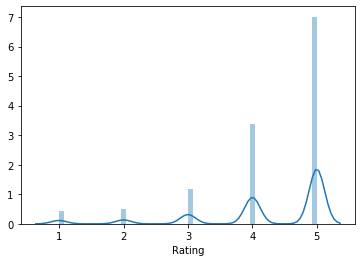

In [14]:
sns.distplot(data['Rating'])

In [17]:
#Unique items in DF
print("The no of unique items in the data is", len(data['ItemID'].unique()))

#Unique Customers in DF
print("The no of unique customers in the data is", len(data['CustomerID'].unique()))

The no of unique items in the data is 22267
The no of unique customers in the data is 280


In [18]:
#Active customers - Those who given more no of ratings
data['CustomerID'].value_counts().head()

A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
Name: CustomerID, dtype: int64

## Types of Recommender Systems

### Popularity model

In [6]:
# Getting the new dataframe which contains users who has given 50 or more ratings

new_df=raw_data.groupby("ItemID").filter(lambda x:x['Rating'].count() >=50)

In [8]:
new_df.head()

,CustomerID,ItemID,Rating,Timestamp
183,A1BKC6B7YHYTVV,0972683275,4.0,1405382400
184,AWVFSIB42LHKJ,0972683275,4.0,1405209600
185,A36MQBNADRH8YY,0972683275,5.0,1405641600
186,A3SRXMPLAEZ6DP,0972683275,4.0,1405987200
187,A20XXTXWF2TCPY,0972683275,5.0,1405123200


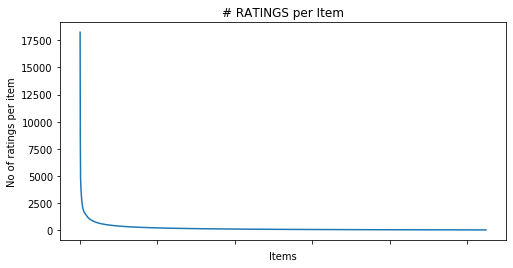

In [12]:


no_of_ratings_per_item = new_df.groupby(by='ItemID')['Rating'].count().sort_values(ascending=False)

fig = plt.figure(figsize=plt.figaspect(.5))
ax = plt.gca()
plt.plot(no_of_ratings_per_item.values)
plt.title('# RATINGS per Item')
plt.xlabel('Items')
plt.ylabel('No of ratings per item')
ax.set_xticklabels([])

plt.show()

In [17]:
#Average rating of the product 

new_df.groupby('ItemID')['Rating'].mean().head()

ItemID
0972683275    4.470980
1400501466    3.560000
1400501520    4.243902
1400501776    3.884892
1400532620    3.684211
Name: Rating, dtype: float64

In [19]:
#Average rating in ascending order

new_df.groupby('ItemID')['Rating'].mean().sort_values(ascending=False).head()


ItemID
B002E6R7NG    4.980392
B004I763AW    4.966667
B003J9QQWU    4.964286
B0043ZLFXE    4.955556
B000TMFYBO    4.953125
Name: Rating, dtype: float64

In [22]:
#Total no of rating for product

popular_items = new_df.groupby(['ItemID'])['CustomerID'].count().\
                              sort_values(ascending=False).\
                              reset_index().head()
popular_items

,ItemID,CustomerID
0,B0074BW614,18244
1,B00DR0PDNE,16454
2,B007WTAJTO,14172
3,B0019EHU8G,12285
4,B006GWO5WK,12226


In [23]:
ratings_mean_count = pd.DataFrame(new_df.groupby('ItemID')['Rating'].mean())

In [24]:
ratings_mean_count['rating_counts'] = pd.DataFrame(new_df.groupby('ItemID')['Rating'].count())

In [25]:
ratings_mean_count.head()

,Rating,rating_counts
ItemID,,
0972683275,4.470980,1051
1400501466,3.560000,250
1400501520,4.243902,82
1400501776,3.884892,139
1400532620,3.684211,171


In [26]:
ratings_mean_count.shape

(26226, 2)

In [27]:
ratings_mean_count['rating_counts'].max()

18244

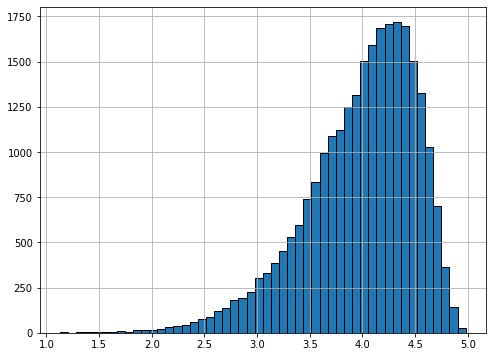

In [28]:
# Visualising 

plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['Rating'].hist(bins=50)

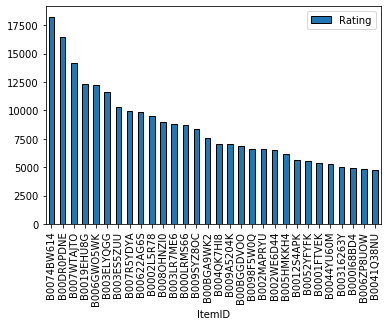

In [30]:
#plotting the popular products/items

popular_products = pd.DataFrame(new_df.groupby('ItemID')['Rating'].count())
most_popular = popular_products.sort_values('Rating', ascending=False)
most_popular.head(30).plot(kind = "bar")

## Colaberative filtering (item to item recommendation)